In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import requests as rq

In [17]:
topo_json = rq.get('http://0.0.0.0:8080/topology_graph').json()
host_json = rq.get('http://0.0.0.0:8080/hosts')

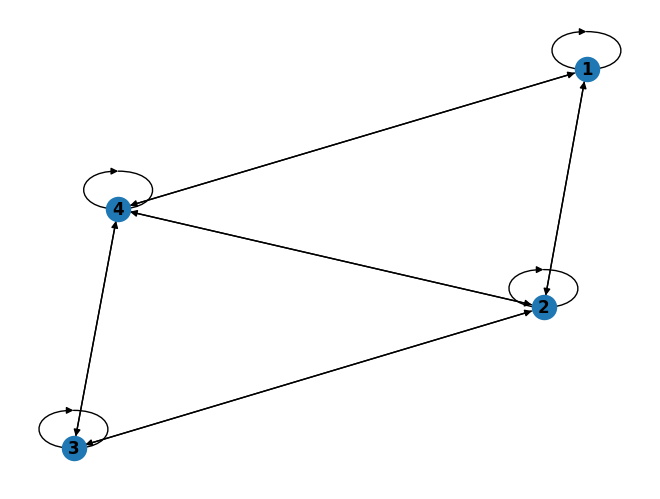

In [18]:
# json to networkx object
graph = nx.json_graph.node_link_graph(topo_json)
# plot graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [19]:
for host in host_json['hosts']:
    host_id = int(host['mac'].translate(str.maketrans('','',":.- ")), 16)
    graph.add_node(f'h{host_id}', type='host')
    # add bi-directional link between host and switch
    graph.add_edge(f'h{host_id}', int(host['port']['dpid']), type='host')
    graph.add_edge(int(host['port']['dpid']), f'h{host_id}', type='host')

nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

TypeError: 'Response' object is not subscriptable

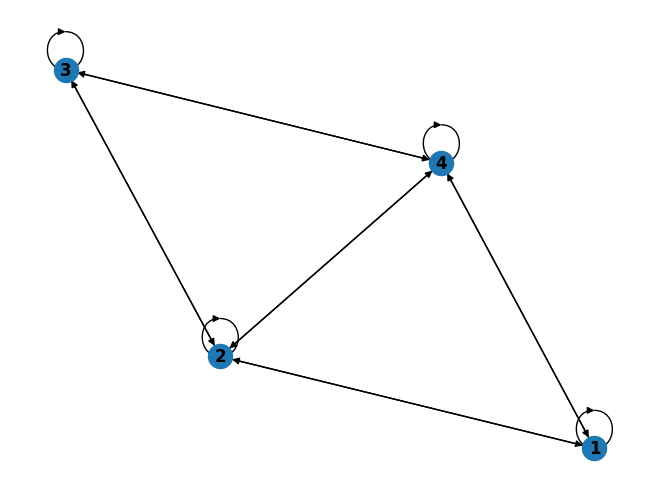

<class 'numpy.ndarray'>
[[], [2, 3, 4], [1, 3], [1, 2, 4], [1, 3]]
{2: 1, 3: 2, 4: 3, 1: 4}


In [ ]:
mapping = dict(zip(graph.nodes(), range(1, len(graph.nodes())+1)))
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()
# number of nodes
number_node = len(graph.nodes())
bin_matrix = nx.adjacency_matrix(graph).todense()
print(type(bin_matrix))
adj_matrix = [[] for i in range(number_node+1)]
for i in range(1, number_node+1):
    for j in range(1, number_node+1):
        if bin_matrix[i-1][j-1] == 1:
            adj_matrix[i].append(j)

print(adj_matrix)
print(mapping)

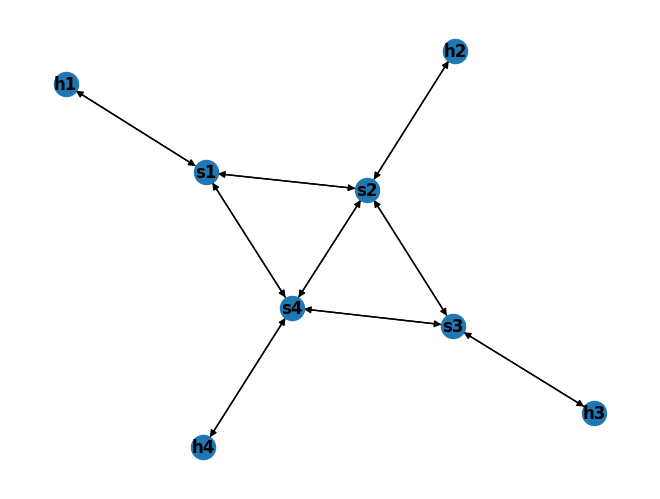

In [ ]:
import networkx as nx
import requests as rq
import matplotlib.pyplot as plt

graph = nx.json_graph.node_link_graph(rq.get('http://0.0.0.0:8000/graph').json())
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()


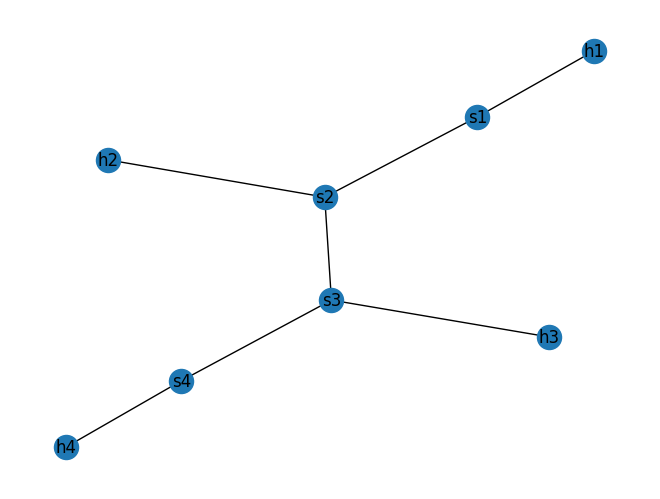

In [ ]:
from scenario.mn_network.mn_restapi.spanning_tree import SpanningTree
new_graph = SpanningTree(graph, 1).solution_as_networkx()
nx.draw(new_graph, with_labels=True)